# **5. Bayes**

Se selccionan las variables explicativas y la respuesta.

In [1]:

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import math
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, roc_auc_score, classification_report
)

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
df = pd.read_csv("C:\\Users\\taran\\OneDrive\\Desktop\\ML_PF_entrega3\\PF_GestHospitalClasificacion_Entrega3\\data\\diabetic_data_limpio.csv")

In [3]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"].map({"No": 0, "Yes": 1}) 

Se separan el conjunto de entrenamiento y test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Creamos vectores con cada tipo de variable para hacer el correcto manejo de las variables antes de modelar.

In [5]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
num_features = X.select_dtypes(include=["int64", "float64"]).columns

A continuación, se crean los pipelines de preprocesamiento, modelo logístico con gridsearch y validación ccruzada estratificada, y modelo de knn con gridsearch y vlaidación cruzada estratificada.

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [7]:
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo="Modelo"):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    print(f"\n{nombre_modelo}")
    print(f"Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")
    if auc:
        print(f"AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred))

    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Curva ROC - {nombre_modelo}")
        plt.legend()
        plt.show()

    return {
        "Modelo": nombre_modelo,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AUC": auc
    }


## **4.1.1 Clasificador Bayesiano estandar**

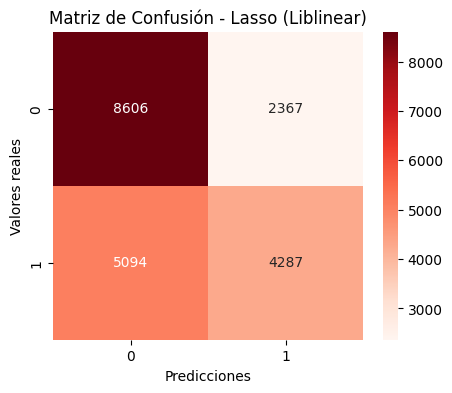


Lasso (Liblinear)
Accuracy: 0.633 | Precision: 0.644 | Recall: 0.457 | F1: 0.535
AUC: 0.681
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     10973
           1       0.64      0.46      0.53      9381

    accuracy                           0.63     20354
   macro avg       0.64      0.62      0.62     20354
weighted avg       0.64      0.63      0.62     20354



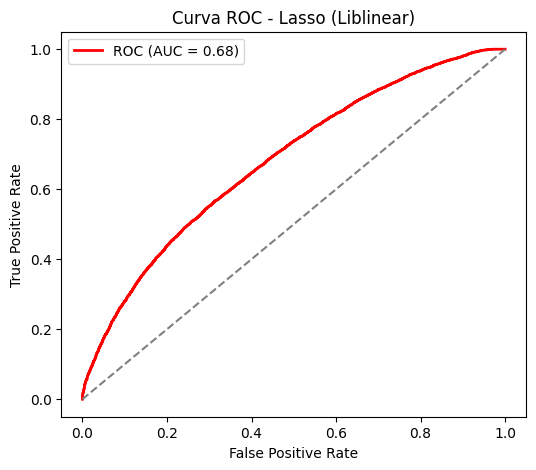

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


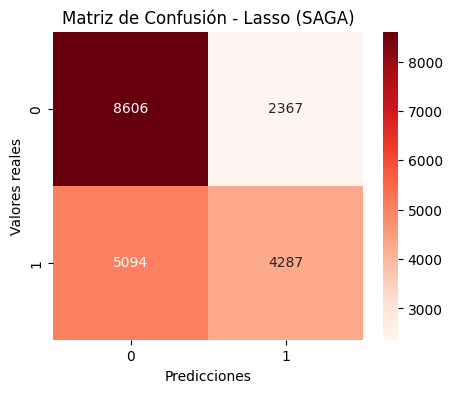


Lasso (SAGA)
Accuracy: 0.633 | Precision: 0.644 | Recall: 0.457 | F1: 0.535
AUC: 0.681
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     10973
           1       0.64      0.46      0.53      9381

    accuracy                           0.63     20354
   macro avg       0.64      0.62      0.62     20354
weighted avg       0.64      0.63      0.62     20354



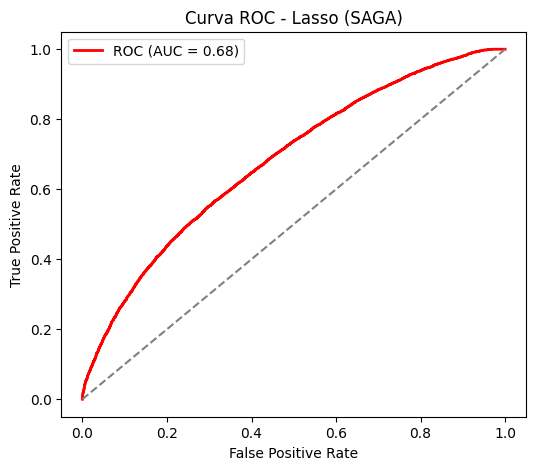

In [8]:
# 🔹 Lasso estándar (solver 'liblinear')
start = time.time()
lasso_std = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, random_state=42))
])
lasso_std.fit(X_train, y_train)
end = time.time()
metrics_lasso_std = evaluar_modelo(lasso_std, X_test, y_test, "Lasso (Liblinear)")
metrics_lasso_std["Tiempo (s)"] = round(end - start, 3)

# 🔹 Lasso optimizado (solver 'saga')
start = time.time()
lasso_saga = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(penalty="l1", solver="saga", max_iter=1000, random_state=42, n_jobs=-1))
])
lasso_saga.fit(X_train, y_train)
end = time.time()
metrics_lasso_saga = evaluar_modelo(lasso_saga, X_test, y_test, "Lasso (SAGA)")
metrics_lasso_saga["Tiempo (s)"] = round(end - start, 3)


c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:319: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


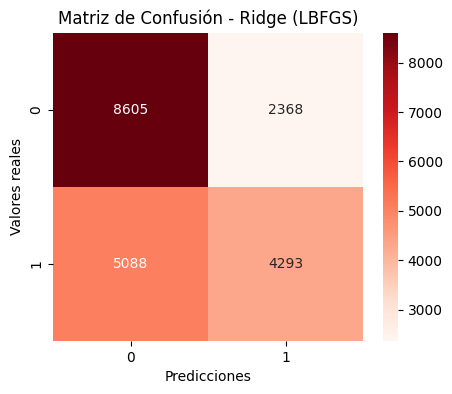


Ridge (LBFGS)
Accuracy: 0.634 | Precision: 0.644 | Recall: 0.458 | F1: 0.535
AUC: 0.681
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     10973
           1       0.64      0.46      0.54      9381

    accuracy                           0.63     20354
   macro avg       0.64      0.62      0.62     20354
weighted avg       0.64      0.63      0.62     20354



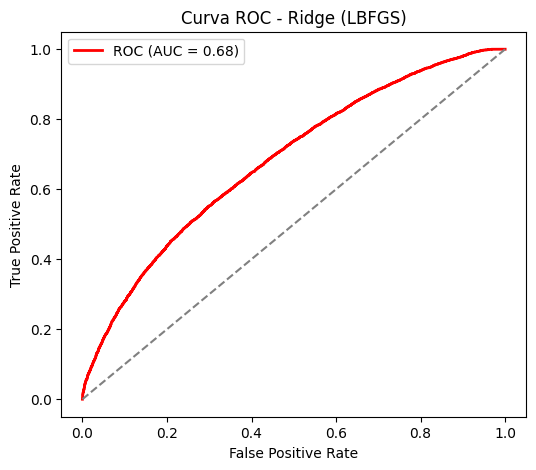

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


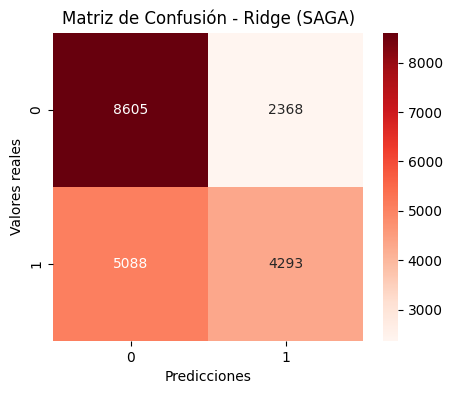


Ridge (SAGA)
Accuracy: 0.634 | Precision: 0.644 | Recall: 0.458 | F1: 0.535
AUC: 0.681
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     10973
           1       0.64      0.46      0.54      9381

    accuracy                           0.63     20354
   macro avg       0.64      0.62      0.62     20354
weighted avg       0.64      0.63      0.62     20354



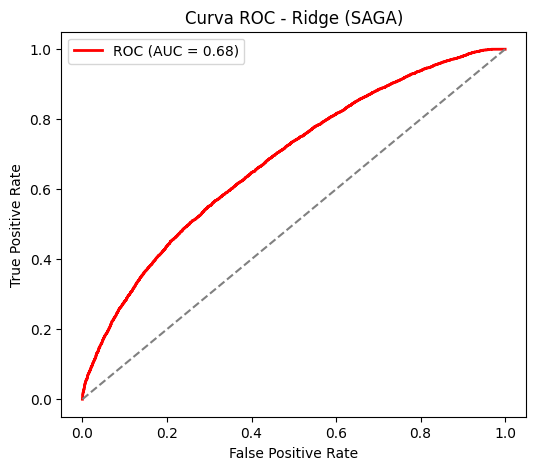

In [9]:
# 🔹 Ridge estándar (solver 'lbfgs')
start = time.time()
ridge_std = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(penalty="l2", solver="lbfgs", max_iter=1000, random_state=42))
])
ridge_std.fit(X_train, y_train)
end = time.time()
metrics_ridge_std = evaluar_modelo(ridge_std, X_test, y_test, "Ridge (LBFGS)")
metrics_ridge_std["Tiempo (s)"] = round(end - start, 3)

# 🔹 Ridge optimizado (solver 'saga')
start = time.time()
ridge_saga = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(penalty="l2", solver="saga", max_iter=1000, random_state=42, n_jobs=-1))
])
ridge_saga.fit(X_train, y_train)
end = time.time()
metrics_ridge_saga = evaluar_modelo(ridge_saga, X_test, y_test, "Ridge (SAGA)")
metrics_ridge_saga["Tiempo (s)"] = round(end - start, 3)

In [10]:
resultados = pd.DataFrame([
    metrics_ridge_std, metrics_ridge_saga,
    metrics_lasso_std, metrics_lasso_saga
])

print("\n🔍 Resultados comparativos (Ridge/Lasso con SAGA):")
print(resultados.sort_values("F1", ascending=False).reset_index(drop=True))


🔍 Resultados comparativos (Ridge/Lasso con SAGA):
              Modelo  Accuracy  Precision    Recall        F1       AUC  \
0      Ridge (LBFGS)  0.633684   0.644498  0.457627  0.535220  0.681092   
1       Ridge (SAGA)  0.633684   0.644498  0.457627  0.535220  0.681084   
2  Lasso (Liblinear)  0.633438   0.644274  0.456988  0.534705  0.681109   
3       Lasso (SAGA)  0.633438   0.644274  0.456988  0.534705  0.681112   

   Tiempo (s)  
0       8.159  
1     141.821  
2       6.619  
3     197.169  


C:\Users\taran\AppData\Local\Temp\ipykernel_15464\3902264943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="F1", data=resultados, palette="Reds")


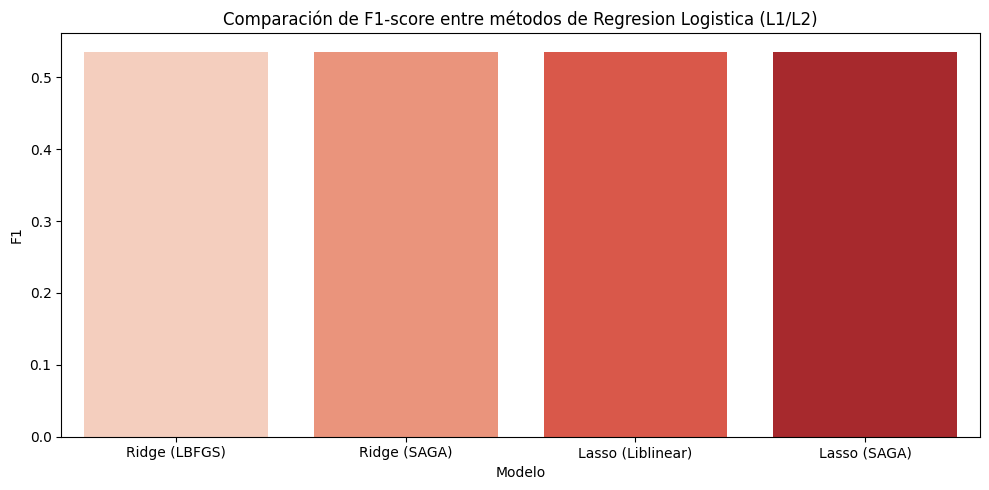

C:\Users\taran\AppData\Local\Temp\ipykernel_15464\3902264943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Tiempo (s)", data=resultados, palette="Reds")


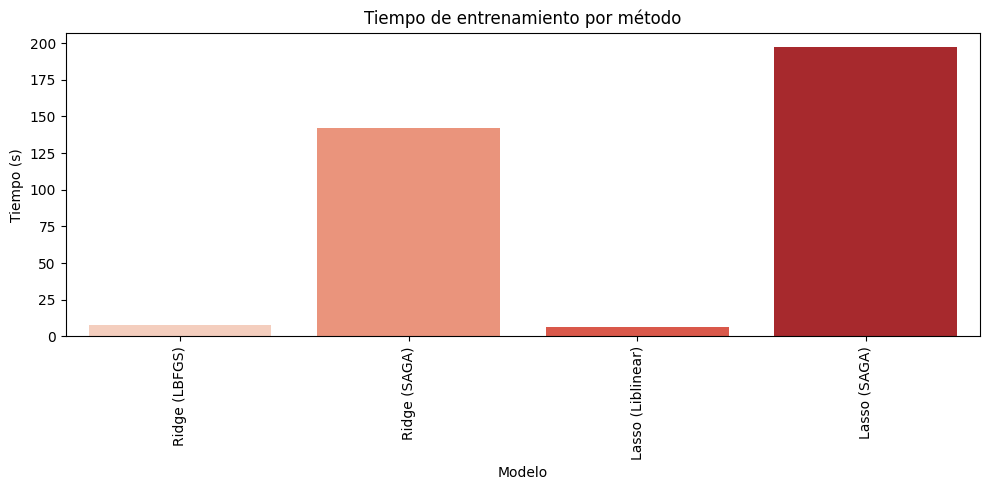

In [ ]:
#  Visualización comparativa
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="F1", data=resultados, palette="Reds")
plt.title("Comparación de F1-score entre métodos de Regresion Logistica (L1/L2)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="Tiempo (s)", data=resultados, palette="Reds")
plt.title("Tiempo de entrenamiento por método")
plt.xticks(rotation=9)
plt.tight_layout()
plt.show()